<div style="background-color: #002676; padding: 20px;">
<img src="https://macss.berkeley.edu/wp-content/uploads/2023/09/UCBMaCSS_Logo_2Color_Reverse_TaglineB.png" alt="MaCSS" width="300">
</div>

# **Notebook 2:** Data Exploration

[wdtmacss@berkeley.edu](mailto:wdtmacss@berkeley.edu)\
**Computational Social Science 1A**\
[Human Psychology and Social Technologies](https://classes.berkeley.edu/content/2024-fall-compss-214a-001-lec-001) 
Fall 2024\
UC Berkeley [Masters in Computational Social Science](https://macss.berkeley.edu/about/)

**Week 3:** Exploring and understanding the dataset that accompanies the [McCabe et al (2024)](https://www.nature.com/articles/s41586-024-07524-8) study ([https://github.com/DiogoFerrari/replication-twitter-deplatforming](https://github.com/DiogoFerrari/replication-twitter-deplatforming)).

👩🏾‍🔬🧑‍💻👩🏻‍💻👨🏿‍💻🔬

---

# Table of Contents
1. [Notebook 2: Data Exploration](#notebook-2-data-exploration)
2. [Announcements](#announcements)
3. [Summary of Today's Class](#summary-of-todays-class)
4. [Recap: The McCabe et al. Study & Dataset](#recap-the-mccabe-et-al-study-dataset)
5. [An Introduction to the McCabe Dataset](#an-introduction-to-the-mccabe-dataset)
     - [What are the variables?](#what-are-the-variables)
     - [Formatting the date variable](#formatting-the-date-variable)
     - [Inspecting groups in the data](#inspecting-groups-in-the-data)
6. [Class Exercises](#class-exercises)
   - [Exercise 1: Counting Users](#exercise-1-counting-users)
     - [Example 1: How many Qanon users are there?](#example-1-how-many-qanon-users-are-there)
     - [Challenge 1: How many Trump followers?](#challenge-1-how-many-trump-followers)
   - [Exercise 2: Counting Tweets and Retweets](#exercise-2-counting-tweets-and-retweets)
     - [Example 2: Counting Tweets by Qanon users over time](#example-2-counting-tweets-by-qanon-users-over-time)
     - [Challenge 2: Examine posts over time by Trump followers](#challenge-2-examine-posts-over-time-by-trump-followers)
   - [Exercise 3: Posts by Deplatformed Users](#exercise-3-posts-by-deplatformed-users)
     - [Example 3: Plotting posts by suspended accounts](#example-3-plotting-posts-by-suspended-accounts)
     - [Challenge 3: Examine posts by Deplatformed users](#challenge-3-examine-posts-by-deplatformed-users)
   - [Bonus Exercise: Misinformation Sharing](#bonus-exercise-misinformation-sharing)
     - [Bonus Example: Using Seaborn's FacetGrid to explore data](#bonus-example-using-seaborns-facetgrid-to-explore-data)
     - [Bonus Challenge: Sharing patterns for regular information](#bonus-challenge-sharing-patterns-for-regular-information)


---

# Announcments
*  Gradescope for this class now exists - you should have received an invite
*  Python fundamentals -- how was the workshop? 
*  Assignment 2 -- more below
*  Next week =  **difference in differences analysis**
*  Questions?

## Assignment 2 Preview
You will write a short computational essay using Difference in Differences analysis to provide an answer to the question: \
*Did the deplatforming intervention reduce misinformation sharing on Twitter?* 

**Computational essay =** a jupyter notebook integrating code (python), data (the McCabe dataset), and analysis (regression) with narrative (markdown cells)  

*  Your essay will read in the data, explore the structure of the dataset, and perform difference in difference analysis to examine the effects of the intervention.
*  Your notebook should include code, results, and visuzaliations
*  But it should also include simple narrative commentary explaining the analyses you are undertaking and the motivation
*  You will end with a brief narrative conclusion providing your answer to the question above.
*  Strong essays will include consideration of the limitations of the dataset and of the difference in differences analysis method, either verbal or integrating data.
*  I will provide a notebook template for your to edit/fill in.

I am hoping that this Assignment can be an exercise in writing a brief computational essay that you enjoy and feel proud of. Feel free to be creative and exploratory, and to include in your notebook any reflections on your limitations, such as analyses you would wish to perform but are unable to, or any key coding limitations that have limited your analyses.

**I will circulate an assignment description and grading sheet next week** I may extend the deadline and/or add another lab session on DiD before the assingment is due depending on how people do in next week's lab. Ask me about the draft grading scheme.

# Summary of Today's Class
The goal in this notebook is to get to know the dataset that was publicly released along with the McCabe et al study, before we begin to analyze the dataset next week. 

**Today we will:** 
*  Recap the McCabe et al. (2024) study
*  Work through the key variables in the dataset togethor as a class
*  Work through three exercises in data exploration individually.

Today's programming exercises are designed to help you get to know the dataset a little better. The excersises involve summarising and plotting the data under a range of different distinctions relating to groups of users, time windows, and categories of misinformation.   

**Functionality we will cover today:**
*   Loading in a dataset from a csv into a [Pandas DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)
*   Accessing, subsetting, and summarising data in a Pandas DataFrame
*   Using Pandas `datetime` objetcs and methods to extract data from a Pandas DataFrame within a specific time window
*   Time series plotting with [Matplotlib](https://matplotlib.org/)
    * line plots, bar plots
    * using color and opacity to overlay multiple sources of data
    * Manipulating the shape of a figure
    * Drawing vertical lines with different styles

# Recap: The McCabe et al. Study & Dataset

**Twitter Deplatformed 70,000 Accounts to curb misinformation** Did it work?

From last week:

> In 2021, Twitter undertook a highly unusual intervention designed to counteract the spread of misinformation during a critical political event. Under normal circumstances, the effects of social media algorithms on information spread are very difficult to detect. This intervention was unusual because the number of deplatformed users was large, they belonged to a specific group, and the timing was made publicly known. A team of social media researchers examined the effects of this intervention, and published their findings in the world's most prestigous scientific journal.

**Questions we dicussed last week**
*  What does depltforming mean in this context?
*  Who were the people included in the dataset?
*  What do we know about the people who were deplatformed?
*  What is the timeline of relevant events?
*  What are the main objectives of the research?
*  What are the key analyses used?
*  What are the major conclusions?



---
# An Introduction to the McCabe Dataset

Before doing individual exercises, we will investigate the variables in the datset togethor. We will perform some simple summaries and data vizualizations to get to know what's in there.

*   First, we will load in the dataset into a Pandas `Dataframe` and talk through the variables.
*   Second, we will:
     *   format the date variable
     *   examine the different groups of users

In [1]:
import pandas as pd
import matplotlib.pyplot as plt # Matplotlib is the de facto standard plotting library in Python

In [25]:
df = pd.read_csv('mccabe-2020-data.csv')

In [26]:
df.shape # (num rows, num columns)

(32968, 29)

In [43]:
df.head(10)

,date,fake_merged,fake_merged_initiation,fake_merged_rt,fake_grinberg_initiation,fake_grinberg_rt,fake_grinberg_rb_initiation,fake_grinberg_rb_rt,fake_newsguard_initiation,fake_newsguard_rt,...,not_fake_shopping,not_fake_shopping_initiation,not_fake_shopping_rt,not_fake_sports,not_fake_sports_initiation,not_fake_sports_rt,n,stat,nusers,group
0,2019-11-30,875.0,199.0,676.0,74.0,207.0,42.0,138.0,188.0,653.0,...,196.0,61.0,135.0,16.0,7.0,9.0,12387.0,total,4390,fns
1,2019-12-01,3382.0,825.0,2557.0,257.0,941.0,120.0,546.0,760.0,2293.0,...,608.0,207.0,401.0,99.0,33.0,66.0,54897.0,total,11629,fns
2,2019-12-02,3644.0,992.0,2652.0,280.0,780.0,141.0,479.0,926.0,2455.0,...,684.0,289.0,395.0,82.0,37.0,45.0,68505.0,total,13132,fns
3,2019-12-03,4184.0,1110.0,3074.0,339.0,921.0,185.0,562.0,1052.0,2890.0,...,782.0,236.0,546.0,92.0,41.0,51.0,74502.0,total,13997,fns
4,2019-12-04,4436.0,1100.0,3336.0,307.0,1171.0,135.0,540.0,1038.0,3146.0,...,540.0,261.0,279.0,124.0,53.0,71.0,71762.0,total,13967,fns
5,2019-12-05,4553.0,1143.0,3410.0,362.0,1225.0,179.0,591.0,1071.0,2955.0,...,497.0,220.0,277.0,106.0,30.0,76.0,73712.0,total,14213,fns
6,2019-12-06,4793.0,1161.0,3632.0,348.0,1369.0,191.0,746.0,1106.0,3420.0,...,554.0,278.0,276.0,105.0,48.0,57.0,71382.0,total,13862,fns
7,2019-12-07,3667.0,865.0,2802.0,253.0,891.0,118.0,503.0,821.0,2695.0,...,680.0,278.0,402.0,121.0,59.0,62.0,57632.0,total,12227,fns
8,2019-12-08,4032.0,926.0,3106.0,312.0,1067.0,181.0,491.0,873.0,2726.0,...,604.0,262.0,342.0,126.0,41.0,85.0,57830.0,total,12358,fns
9,2019-12-09,5052.0,1314.0,3738.0,423.0,1307.0,258.0,637.0,1250.0,3370.0,...,623.0,233.0,390.0,155.0,42.0,113.0,74561.0,total,13776,fns


In [29]:
df.columns

Index(['date', 'fake_merged', 'fake_merged_initiation', 'fake_merged_rt',
       'fake_grinberg_initiation', 'fake_grinberg_rt',
       'fake_grinberg_rb_initiation', 'fake_grinberg_rb_rt',
       'fake_newsguard_initiation', 'fake_newsguard_rt', 'not_fake',
       'not_fake_initiation', 'not_fake_rt', 'not_fake_conservative',
       'not_fake_conservative_initiation', 'not_fake_conservative_rt',
       'not_fake_liberal', 'not_fake_liberal_initiation',
       'not_fake_liberal_rt', 'not_fake_shopping',
       'not_fake_shopping_initiation', 'not_fake_shopping_rt',
       'not_fake_sports', 'not_fake_sports_initiation', 'not_fake_sports_rt',
       'n', 'stat', 'nusers', 'group'],
      dtype='object')

In [30]:
df.iloc[0]

date                                2019-11-30
fake_merged                              875.0
fake_merged_initiation                   199.0
fake_merged_rt                           676.0
fake_grinberg_initiation                  74.0
fake_grinberg_rt                         207.0
fake_grinberg_rb_initiation               42.0
fake_grinberg_rb_rt                      138.0
fake_newsguard_initiation                188.0
fake_newsguard_rt                        653.0
not_fake                               11512.0
not_fake_initiation                     4357.0
not_fake_rt                             7155.0
not_fake_conservative                    529.0
not_fake_conservative_initiation         156.0
not_fake_conservative_rt                 373.0
not_fake_liberal                        1030.0
not_fake_liberal_initiation              247.0
not_fake_liberal_rt                      783.0
not_fake_shopping                        196.0
not_fake_shopping_initiation              61.0
not_fake_shop

---

## What are the variables?

The Github repository contains a codebook describing the variables in the dataset. The codebook (pdf document) can be accessed here:

[github.com/DiogoFerrari/replication-twitter-deplatforming/blob/master/codebook.pdf](https://github.com/DiogoFerrari/replication-twitter-deplatforming/blob/master/codebook.pdf)

Let's go through these variables together.

Main variable categories:
* fake
   *  fake_initiation (number of fake news links posted)
   *  fake_rt (number of fake news links retweeted)
   *  fake (fake_initiation + fake_rt)  
* not fake
   * not_fake_initiation
   * not_fake_rt
   * not_fake (not_fake_initiation + not_fake_rt)
* fake_grinberg, fake_newsgaurd, etc (analagous but _fake_ classification is made according to a different list eg. newsgaurd list -- link to lists from article here or make that an excersise?)
* n (fake + not fake)
* stat (avg, total)
* nusers
* Date (we will discuss below &darr;)
* User groups (e.g. qanon, suspended; we will go through user groups below &darr; &darr;)


## Formatting the date variable

This dataset is a temporally organized dataset: we are tracking **numbers of tweets and retweets over time among different groups**. The `date` variable indexes every row to a specific date.

Pandas has some useful methods for dealing with date formatted columns. To make use of these methods, we need to tell Pandas that the `date` column should be treated as a `datetime` object. 

To do this, we override the `date` column with a new Series derrived from the original `date` column via the Pandas `to_datetime` [function](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html).

In [31]:
df['date'] = pd.to_datetime(df['date'])

The `datetime` object is useful because you can do handy things with it such as extracting the day or the month or year automatically:

In [32]:
# select a random row from the dataset using the dataframe `sample` method
random_row = df.sample(n=1)

# access properties of the date for that row using the `.dt` syntax
# for example, let's access the month property
random_row['date'].dt.month

17739    1
Name: date, dtype: int32

The datetime object is particuarly powerful because it allows you to more easily extract data for a specific *time window*. For example, suppose we want only tweets that were made in july. 

We can **extract the data from this time window** by specifying a start date (expressed as a string using the format `yyyy-mm-dd`) and and end date (expressed as a string using the format `yyyy-mm-dd`) and using these to subset the dataframe. 

In [33]:
start_date = '2020-07-01' # first day of july
end_date = '2020-07-31' # final day of july

In Pandas, you can easily subset a Dataframe using multiple conditions using the syntax `df[(condition_1) & (condition_2)]`. In this context, our conditions the start and the end dates. We wish to select rows that have a more recent date than the start date and an older date than the end date. You can express this as follows:  

In [34]:
july_data = df[(df['date'] >= start_date) & (df['date'] < end_date)]

Let's take a looks at a sample of the Jukly data to check:

In [35]:
july_data.sample(n=4)

,date,fake_merged,fake_merged_initiation,fake_merged_rt,fake_grinberg_initiation,fake_grinberg_rt,fake_grinberg_rb_initiation,fake_grinberg_rb_rt,fake_newsguard_initiation,fake_newsguard_rt,...,not_fake_shopping,not_fake_shopping_initiation,not_fake_shopping_rt,not_fake_sports,not_fake_sports_initiation,not_fake_sports_rt,n,stat,nusers,group
32304,2020-07-09,24.0,3.0,21.0,1.0,1.0,0.0,0.0,2.0,21.0,...,1.000000,1.000000,0.000000,3.000000,1.000000,2.000000,509.00000,total,173,F_la
21584,2020-07-24,7361.0,1689.0,5672.0,461.0,1985.0,253.0,1064.0,1601.0,5282.0,...,4270.000000,2116.000000,2154.000000,530.000000,151.000000,379.000000,244411.00000,total,73820,all
23243,2020-07-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.115116,0.660465,0.454651,0.037209,0.018023,0.019186,8.02093,avg,1720,nfns_ha
26949,2020-07-15,374.0,89.0,285.0,51.0,115.0,31.0,44.0,89.0,262.0,...,58.000000,22.000000,36.000000,42.000000,6.000000,36.000000,21067.00000,total,1301,F_ha


This functionality will be very useful later.

## Inspecting Groups in the data
You can call the `unique` method on any columns of a Pandas DataFrame to return a list of the unique values present in that column. Here we can use `unique` to look at the different user groups that are present. 

**Note:** You can also use `nunique` to return a *count* of the unique values present in the column.

In [36]:
groups = df.group.unique()

In [37]:
for group in groups:
  print(group)

fns
suspended
ha
ma
la
qanon
av
ss1
ss5
A
B
D
F
all
nfns
nfns_ha
nfns_ma
nfns_la
A_ha
B_ha
D_ha
F_ha
A_ma
B_ma
D_ma
F_ma
A_la
B_la
D_la
F_la


Let's talk through what the different group codes represent using the [codebook pdf](https://github.com/DiogoFerrari/replication-twitter-deplatforming/blob/master/codebook.pdf). 

**Note:** ha = high activity, la = low_activity

# **Class Exercises**
The exercises below are intended to help you get to the know the dataset better. 

The goal of these exercises is to provide an opportunity to explore the structure and the variables in the dataset. Feel free to be as creative as you like while working through the questions, and to view these exercises as scaffolding for your understanding of the data, rather than evaluative assignments.

Each exercise includes at least one example of code and figures to explore relevant aspects of the data, and a challenge for your to engage with to extend those examples. Add code and text cells to the notebook as you work through the challenges to illustrate your journey through the data and ultimately your answers to the questions below.

---

## Exercise 1: Counting Users 👩🏽‍🦳 👨🏾‍🦲 🤦🏼 ... 🤖 🙋🏻‍♀️

### **Example 1:** How many Qanon users are there?

The group `qanon` indicates that users were classified as belonging to the group of users assosciated with the [Qanon movement](https://en.wikipedia.org/wiki/QAnon).

Example question: **How many users were classified into the Qanon group?** 

The structure of the dataset makes this question a little difficult to answer. The dataset tells us how many tweets a `group` of users posted on a certain day (`date`), reflected in the variable `n`. 

First, we can create a subset of the dataset that contains only the rows relevant to this group:

In [51]:
# subset to just the qanon group
qanon = df[(df['group'] == "qanon")].copy()

qanon.head()

,date,fake_merged,fake_merged_initiation,fake_merged_rt,fake_grinberg_initiation,fake_grinberg_rt,fake_grinberg_rb_initiation,fake_grinberg_rb_rt,fake_newsguard_initiation,fake_newsguard_rt,...,not_fake_shopping,not_fake_shopping_initiation,not_fake_shopping_rt,not_fake_sports,not_fake_sports_initiation,not_fake_sports_rt,n,stat,nusers,group
2140,2019-11-30,232.0,45.0,187.0,33.0,71.0,29.0,50.0,44.0,178.0,...,15.0,9.0,6.0,0.0,0.0,0.0,804.0,total,148,qanon
2141,2019-12-01,602.0,84.0,518.0,18.0,193.0,12.0,144.0,81.0,493.0,...,45.0,30.0,15.0,0.0,0.0,0.0,2606.0,total,299,qanon
2142,2019-12-02,726.0,133.0,593.0,39.0,178.0,35.0,137.0,133.0,570.0,...,27.0,22.0,5.0,0.0,0.0,0.0,3435.0,total,330,qanon
2143,2019-12-03,851.0,137.0,714.0,72.0,233.0,63.0,165.0,131.0,684.0,...,37.0,20.0,17.0,0.0,0.0,0.0,3614.0,total,347,qanon
2144,2019-12-04,873.0,81.0,792.0,16.0,304.0,8.0,162.0,77.0,753.0,...,48.0,38.0,10.0,0.0,0.0,0.0,3271.0,total,346,qanon


**Note:** it can be good practice to take a copy (by calling `.copy`) of the datset when looking at a subset if you plan to modify the new data subset.

As we discussed earlier, the dataset contains some rows that reflect the **average** number of tweets by a specific group on a specific date, and some rows that reflect the **total** number of tweets by a specific group on a specific date. 

Let's choose to look at the total number of posts (`"stat" == "total"`), rather than the average.

In [52]:
qanon_totals = qanon[
    (qanon["stat"] == "total")
].copy()

qanon_totals.head()

,date,fake_merged,fake_merged_initiation,fake_merged_rt,fake_grinberg_initiation,fake_grinberg_rt,fake_grinberg_rb_initiation,fake_grinberg_rb_rt,fake_newsguard_initiation,fake_newsguard_rt,...,not_fake_shopping,not_fake_shopping_initiation,not_fake_shopping_rt,not_fake_sports,not_fake_sports_initiation,not_fake_sports_rt,n,stat,nusers,group
2140,2019-11-30,232.0,45.0,187.0,33.0,71.0,29.0,50.0,44.0,178.0,...,15.0,9.0,6.0,0.0,0.0,0.0,804.0,total,148,qanon
2141,2019-12-01,602.0,84.0,518.0,18.0,193.0,12.0,144.0,81.0,493.0,...,45.0,30.0,15.0,0.0,0.0,0.0,2606.0,total,299,qanon
2142,2019-12-02,726.0,133.0,593.0,39.0,178.0,35.0,137.0,133.0,570.0,...,27.0,22.0,5.0,0.0,0.0,0.0,3435.0,total,330,qanon
2143,2019-12-03,851.0,137.0,714.0,72.0,233.0,63.0,165.0,131.0,684.0,...,37.0,20.0,17.0,0.0,0.0,0.0,3614.0,total,347,qanon
2144,2019-12-04,873.0,81.0,792.0,16.0,304.0,8.0,162.0,77.0,753.0,...,48.0,38.0,10.0,0.0,0.0,0.0,3271.0,total,346,qanon


Let's look at the date and the nusers columns side by side:

In [53]:
qanon_totals[["date", "nusers"]].sample(n=10)

,date,nusers
2326,2020-06-03,661
16390,2021-01-22,254
16280,2020-10-04,636
16369,2021-01-01,582
16210,2020-07-26,640
2259,2020-03-28,555
16449,2021-03-22,184
16310,2020-11-03,568
16301,2020-10-25,326
2352,2020-06-29,637


The variable `nusers` reflects the number of unique users among the tweets collected on *that particular day*. We can also ask, for example, what the maximum number of users observed per day was during the panel.

In [98]:
int(qanon_totals['nusers'].max())

709

Over 700 unique Quanon accounts posting on a single day!

The figure below plots the number of users posting in the `Qanon` group (`nusers`) over time. The graph shows that the number of Qanon accounts grew steadily during 2020, and was much lower around November 2020 (*why might that be*?) and after January 2021.

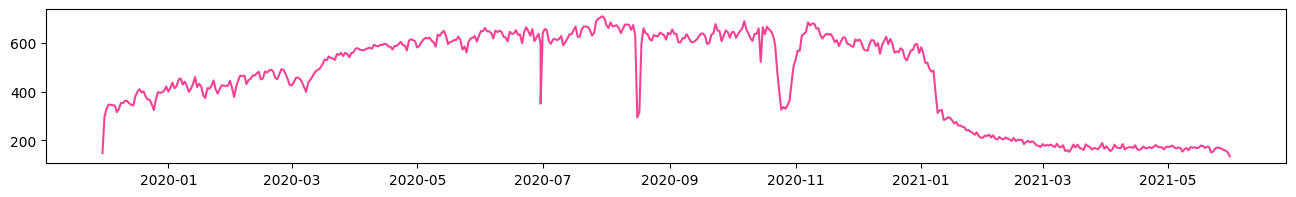

In [99]:
# Create a new figure using Matplotlib
plt.figure(figsize=(16, 2)) # Specify a wide (16) but shallow (2) figure size. 

# add the data to the figure as a line plot 
plt.plot(qanon_totals.date, qanon_totals.nusers, color="#f54295")

In the figure above, we have drawn a simple line plot with the number of Qanon users on the y axis (`qanon_totals.nusers`) and the datetime stamp on the x axis (`qanon_totals.date`). I used a color I like by passing the asrgument `color=...` to the `plt.plot` function. 

### **Challenge 1:** How many Trump followers?

Try to answer the question below, using figures and summary outputs to illustrate your answer. If you interact with an AI system to help with this challenge, remember to follow the policy described last week in Notebook 1 and include a copy of your interacction here or provide a link to the interaction trace.

On average, how many **Trump followers** were active **per day** before january 12th?

1408.4963325183373


,date,fake_merged,fake_merged_initiation,fake_merged_rt,fake_grinberg_initiation,fake_grinberg_rt,fake_grinberg_rb_initiation,fake_grinberg_rb_rt,fake_newsguard_initiation,fake_newsguard_rt,...,not_fake_shopping,not_fake_shopping_initiation,not_fake_shopping_rt,not_fake_sports,not_fake_sports_initiation,not_fake_sports_rt,n,stat,nusers,group


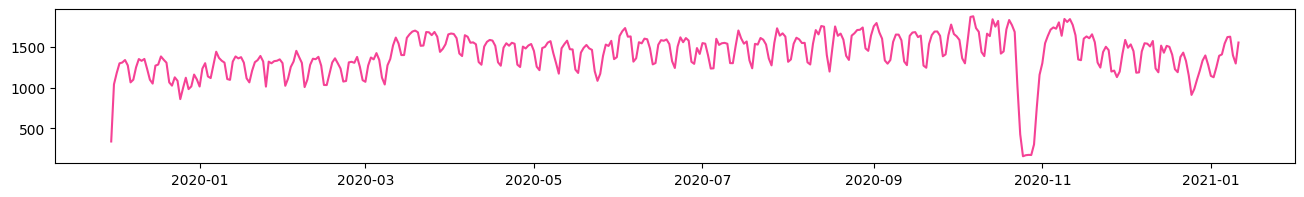

In [142]:
# Your answers to Challenge 1 begin here.
# Add more code and text cells as you need.

trump = df[df['group'] == "A"].copy()
trump = trump.drop(index=18872)

trump_totals = trump[
    (trump["stat"] == "total")
].copy()#.groupby(['date']).sum().reset_index()

trump_totals_before = trump_totals[(trump_totals.date < "2021-01-12")]

print(float(trump_totals_before.nusers.mean()))

plt.figure(figsize=(16, 2))
plt.plot(trump_totals_before.date, trump_totals_before.nusers, color="#f54295")

trump_totals_before[trump_totals_before['date'].duplicated(keep=False)]

# Duplicated data on 2020-06-30

---

## Excersise 2: Counting Tweets and Retweets
Let's look at the number of tweets and retweets made by different groups over time. This will allow us to practice using the datetime object functionality to select time window subsets of the dataframe, and to get to know the variables that count numbers of posts in different categories.

### **Example 2**: Counting Tweets by Qanon users over time
First, let's look at the number of posts made by users assigned to the `Qanon` group during 2021. We can look at the total number of posts and the number of posts that were tagged as Misinformation (as classifieds by the `fake_merged` variable), to see how these two are related, and to look for trends over time.

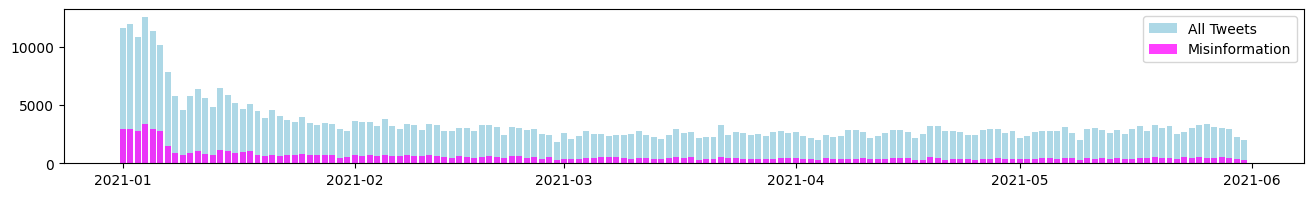

In [102]:
# Subset to just tweets during 2021
qanon_totals_2021 = qanon_totals[qanon_totals.date >= "2021-01-01"]

# Make a wide figure for the timeseries
plt.figure(figsize=(16, 2))

# Plot date on the x axis, and n (total number of tweets) on the y axis
plt.bar(qanon_totals_2021.date, qanon_totals_2021.n, color='lightblue', label="All Tweets")

# Overlay a count of the misinformation tweets (the fake_merged variable) in a different color
plt.bar(
    qanon_totals_2021.date,
    qanon_totals_2021.fake_merged,
    color='magenta',
    alpha=0.75,
    label="Misinformation"
)
plt.legend()

The figure above shows a noticable decrease in both the number of total posts as well as the number of posts tagged as misinformation early in 2021. We can ssume that this sharp decrease is related to the deplatforming event. But is this decrease limited to the `Qanon` group, or is it also seen in other groups?   

### **Chalelnge 2:** Examine posts over time by Trump followers

Try to answer the following question with data. Use figures to make your point.

1. How did the posting patterns of Trump followers change over time in this dataset? Visualize the answer by plotting the numbers of posts over time in this group, including 2020 and perhaps examining particular periods of interest. What do these patterns look like around November 2020?

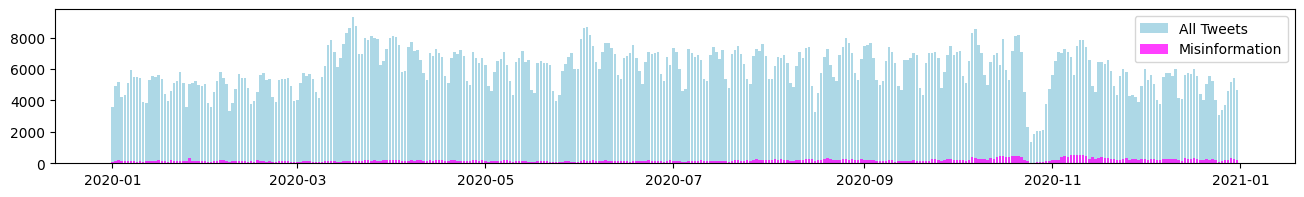

In [148]:
# Subset to just tweets during 2021
trump_totals_2020 = trump_totals[(trump_totals.date >= "2020-01-01") & (trump_totals.date <= "2020-12-31")]

# Make a wide figure for the timeseries
plt.figure(figsize=(16, 2))

# Plot date on the x axis, and n (total number of tweets) on the y axis
plt.bar(trump_totals_2020.date, trump_totals_2020.n, color='lightblue', label="All Tweets")

# Overlay a count of the misinformation tweets (the fake_merged variable) in a different color
plt.bar(
    trump_totals_2020.date,
    trump_totals_2020.fake_merged,
    color='magenta',
    alpha=0.75,
    label="Misinformation" # whatever string you put here will go into the legend
)
plt.legend()

---

## Excersise 3: Posts by Deplatformed Users 🤐 ... 🤐

### **Example 3:** Plotting posts by suspended accounts
Let's now look at posts over time by accounts that were eventually suspended during the Deplatforming window January 6th - January 12th 2021.

In [69]:
# Subset the dataframe to just suspended accounts
# Looking at total counts of posts, not averages
suspended = df[
    (df['group'] == 'suspended') &
    (df['stat'] == "total")
].copy().sort_values('date')

In [70]:
suspended.sample(n=3)

,date,fake_merged,fake_merged_initiation,fake_merged_rt,fake_grinberg_initiation,fake_grinberg_rt,fake_grinberg_rb_initiation,fake_grinberg_rb_rt,fake_newsguard_initiation,fake_newsguard_rt,...,not_fake_shopping,not_fake_shopping_initiation,not_fake_shopping_rt,not_fake_sports,not_fake_sports_initiation,not_fake_sports_rt,n,stat,nusers,group
13810,2021-04-30,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,48.0,total,9,suspended
514,2020-02-24,1278.0,135.0,1143.0,64.0,474.0,45.0,283.0,125.0,1050.0,...,29.0,0.0,29.0,2.0,1.0,1.0,5623.0,total,446,suspended
13824,2021-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,16.0,total,2,suspended


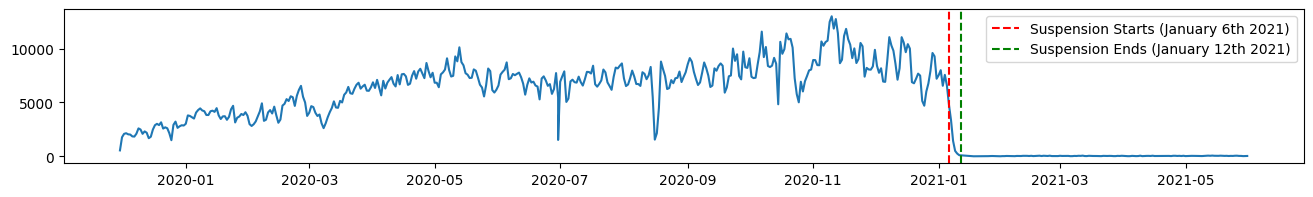

In [85]:
plt.figure(figsize=(16, 2))

# plot post counts over time for accounts that were eventually Deplatformed
plt.plot(suspended.date, suspended.n)

# Specify a datetime object for the start of the suspension period
suspension_start = pd.to_datetime('2021-01-06')

# Specify a datetime object for the end of the suspension period
suspension_end = pd.to_datetime('2021-01-12')

# Plot vertical lines at the start and end of the suspension period
plt.axvline(suspension_start, color='r', linestyle='--', label='Suspension Starts (January 6th 2021)')
plt.axvline(suspension_end, color='g', linestyle='--', label='Suspension Ends (January 12th 2021)')
plt.legend()

So the deplatforming event has a clear signature in the counts of posts made by users over time. On this figure, the number of posts appears to go to zero. But is that actually what happenned? Did deplatformed accounts start posting again after the suspension window?

### **Challenge 3:** Examine posts by Deplatformed users after January 12th 2021

1. How many posts were made by suspended accounts after the suspension period ended?
2. Did Trump followers also stop posting during and after the suspension period? Or did they post even more? Plot the posting trends for Trump followers surrounding the suspension period if you didn't already do this in challenge 2.

4103.0


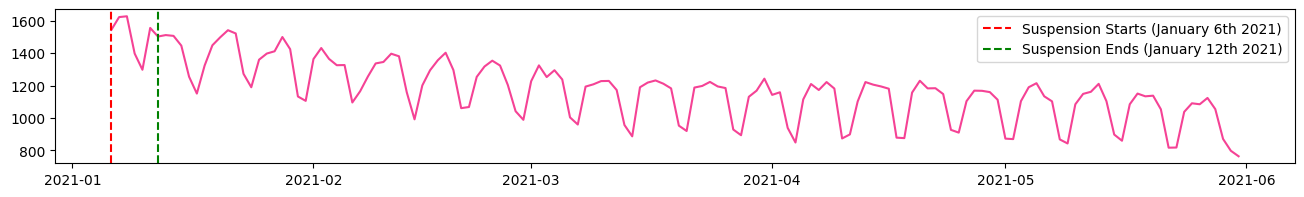

In [146]:
## Your answers to Challenge 3 begin here.
## Add text or code cells as you need.

suspended_posts = suspended.n[suspended.date >= "2021-01-12"].sum()
print(suspended_posts)

plt.figure(figsize=(16, 2))

trump_totals_after = trump_totals[trump_totals.date >= "2021-01-06"]

plt.plot(trump_totals_after.date, trump_totals_after.nusers, color="#f54295")

plt.axvline(suspension_start, color='r', linestyle='--', label='Suspension Starts (January 6th 2021)')
plt.axvline(suspension_end, color='g', linestyle='--', label='Suspension Ends (January 12th 2021)')
plt.legend()

---

## **Bonus** Exercise: Misinformation Sharing
Here's a bonus exercise that you are welcome to work through if you feel comfortable with the exercises above. This exercise is more advanced and the material here is above the required skill level. 

Let's look at sharing patterns for regular content and misinformation. First we will look at total posting rates in 2021 by accounts that were (`fns`) or were not (`nfns`) tagged as misinformation sharers. Then you will look at differnt measures of misnformaton.

### **Bonus Example:** Using Seaborn's FacetGrid to explore sharing of misinformation in 2021

In [80]:
# Here we're just looking at 2021
earliest_date = pd.to_datetime('2021-01-01')

# subset to just two groups
misinformation_subset = df[(
    (df['group'].isin(['fns', 'nfns'])) & # just misinfo sharerers (fns) and no misinfo sharers (nfsn)
    (df['stat'] == "total") & # just look at total tweets
    (df.date >= earliest_date) # just look at 2021 onwards
)].copy()

In the code above, we've used the `isin` method to subset the data to just the `fns` and `nfns` groups. The `isin` method can be applied any Pandas data Series. it accepts a list of values as an argument, and returns truth values indicating whether each value in the column is contained within the list.

This has created a dataset (`misinformation_subset`) that we can use to compare information sharing between the two groups. We can plot the misinformation sharing patterns for these groups using [Seaborn](https://seaborn.pydata.org/)/. Seaborn is an excellent statistical data visualization library. 

One of the most useful functionalities provided by seaborn is the [FacetGrid object](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html). A FacetGrid allows you to automatically plot data broken down by groups on the same plot. Below, we first create a FacetGrid object using the `misinformation_subset` dataframe, specifying the `group` variable as the distinction to be made alone the rows of the plot.

After creating the FacetGrid object, we can map plotting functions onto the object, so that the plotting function will be applied seperately to the differnet groups. Here, we apply the `plt.bar` plotting function, passing the `date` and `fake_merged` variable names as arguments to be used for plotting the x and y axes respectively. 

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x107feb790>>
Traceback (most recent call last):
  File "/Users/chris/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


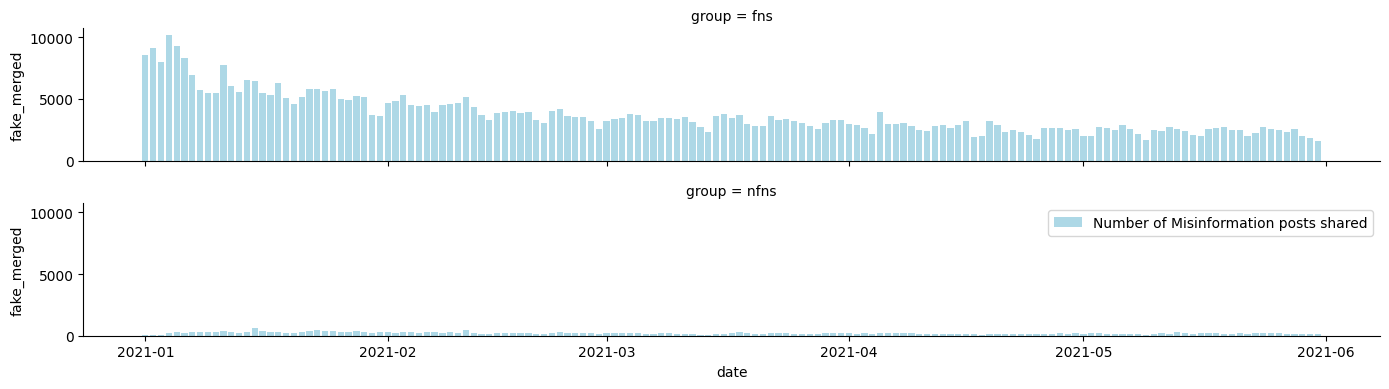

In [82]:
import seaborn as sns

# Use seaborn's FacetGrid to plot misninformation sharing seperately for the two groups
# Here we are putting groups on the rows and specifying wide plots
# but you can also use columns, or a combination of rows and columns
g = sns.FacetGrid(data=misinformation_subset, row='group', aspect=7, height=2)

# Map the matplotlib plotting function plt.bar onto the FacetGrid
g.map(plt.bar, 'date', 'fake_merged', color='lightblue', label="Number of Misinformation posts shared")

# add a legend
plt.legend()

### **Bonus Challenge:** Sharing patterns for regular information

Clearly the patterns of sharing behavior for misinformation will differ between users udentified as Misinformation Sharers (`group == "fns"`) and users who have not shared misinformation (`group == "nfns"`). But do these groups also differ in their sharing patterns for regular information?

Choose one or more of the following `not_fake_...` categories, and compare sharing behavior between Misinformation Sharers and non Misinformation Sharers for those categories.

* `not_fake_rt`
* `not_fake_conservative`

* `not_fake_conservative_initiation`
* `not_fake_conservative_rt`

* `not_fake_liberal`
* `not_fake_liberal_initiation`

* `not_fake_liberal_rt`
* `not_fake_shopping`

* `not_fake_shopping_initiation`
* `not_fake_shopping_rt`

* `not_fake_sports`
* `not_fake_sports_initiation`
* `not_fake_sports_rt`

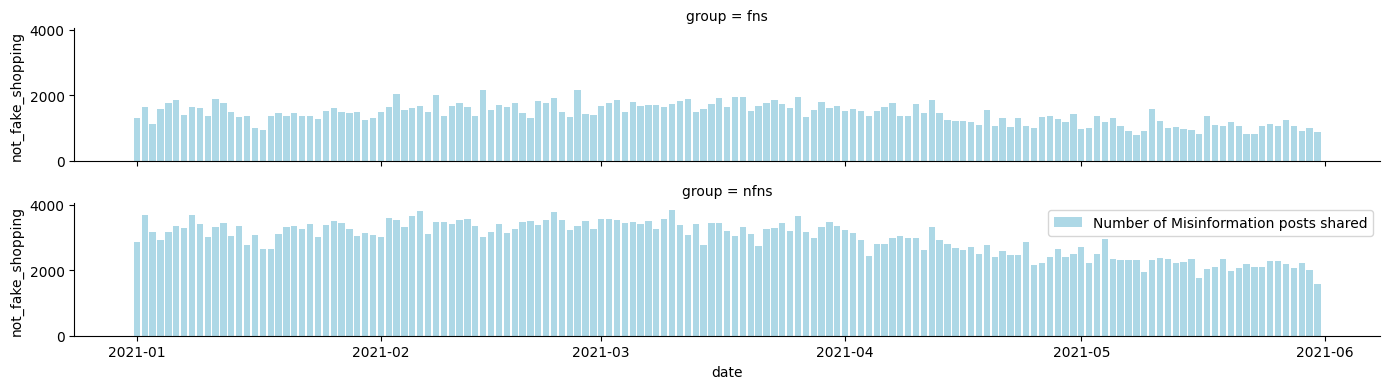

In [90]:
earliest_date = pd.to_datetime('2021-01-01')

# subset to just two groups
misinformation_subset = df[(
    (df['group'].isin(['fns', 'nfns'])) & # just misinfo sharerers (fns) and no misinfo sharers (nfsn)
    (df['stat'] == "total") & # just look at total tweets
    (df.date >= earliest_date) # just look at 2021 onwards
)].copy()

import seaborn as sns

# Use seaborn's FacetGrid to plot misninformation sharing seperately for the two groups
# Here we are putting groups on the rows and specifying wide plots
# but you can also use columns, or a combination of rows and columns
g2 = sns.FacetGrid(data=misinformation_subset, row='group', aspect=7, height=2)

# Map the matplotlib plotting function plt.bar onto the FacetGrid
g2.map(plt.bar, 'date', 'not_fake_shopping', color='lightblue', label="Number of Misinformation posts shared")

# add a legend
plt.legend()

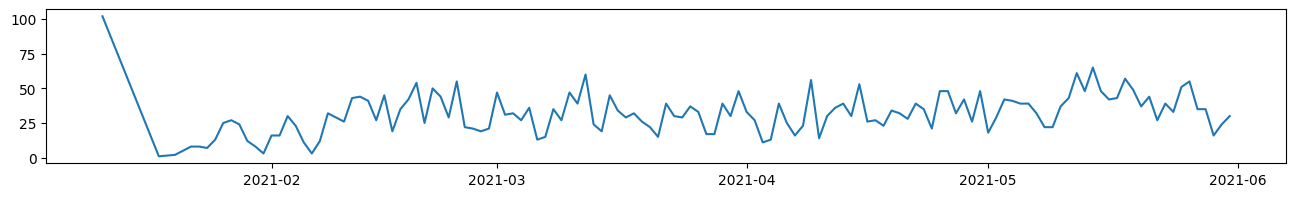

In [149]:
after_12 = suspended[(suspended.date > '2021-01-10')]

plt.figure(figsize=(16, 2))

# plot post counts over time for accounts that were eventually Deplatformed
plt.plot(after_12.date, after_12.n)